In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import joblib
import warnings
warnings.filterwarnings('ignore')

## Data Collection & Analysis

In [3]:
insurance_dataset = pd.read_csv('insurance.csv')

In [4]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_dataset.shape
insurance_dataset.info()
insurance_dataset.isnull().sum()
insurance_dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


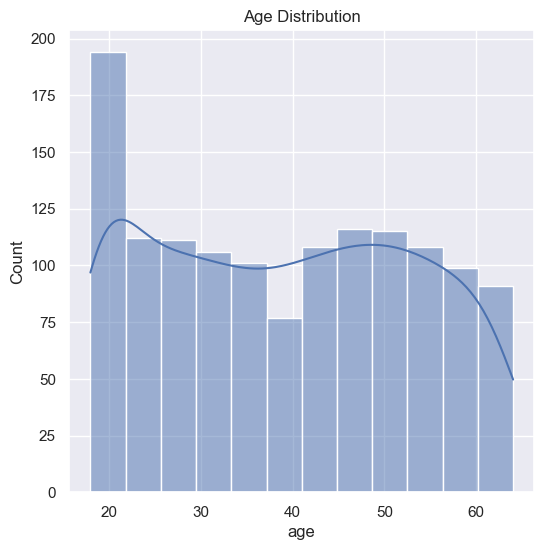

In [6]:
# Age distribution
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['age'], kde=True)
plt.title('Age Distribution')
plt.show()

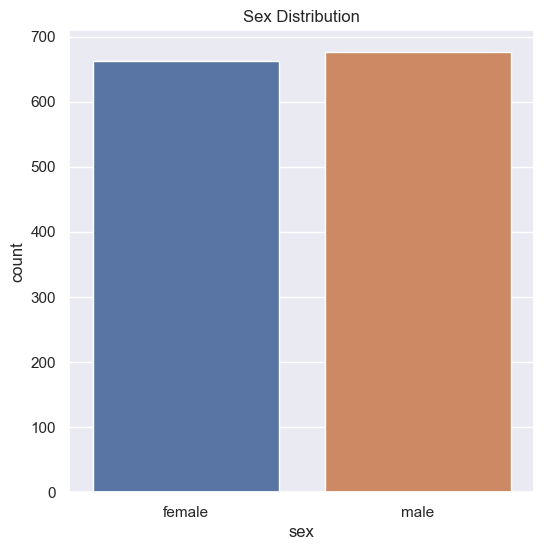

sex
male      676
female    662
Name: count, dtype: int64

In [7]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()
insurance_dataset['sex'].value_counts()

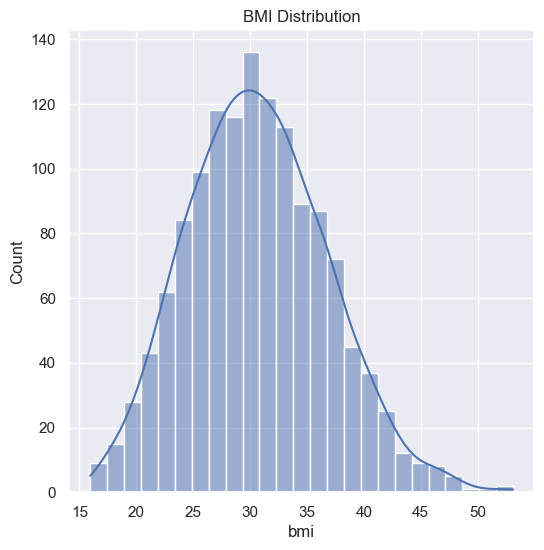

In [8]:
# BMI distribution
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['bmi'], kde=True)
plt.title('BMI Distribution')
plt.show()

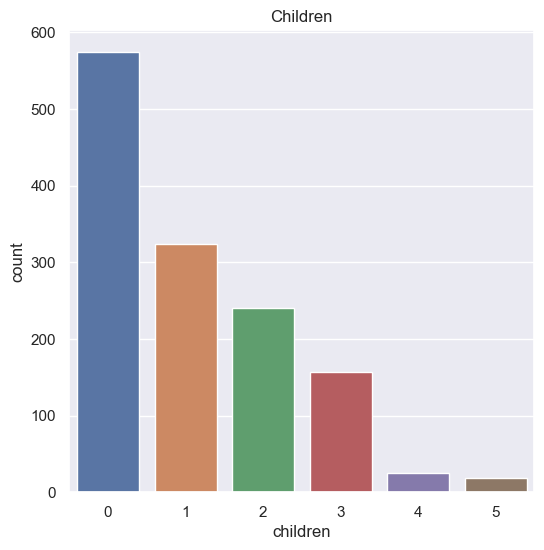

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [9]:
# Children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()
insurance_dataset['children'].value_counts()

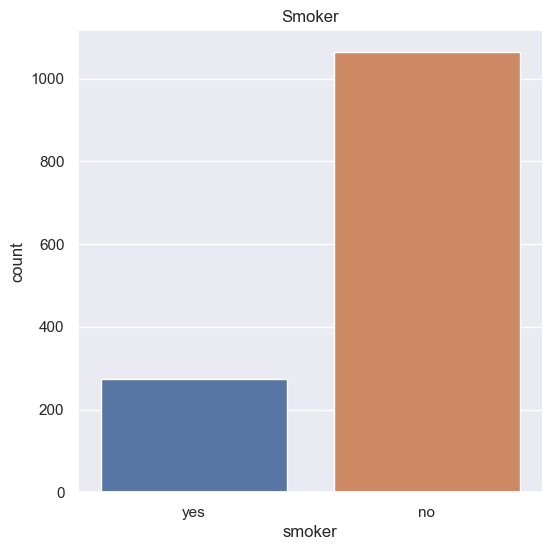

smoker
no     1064
yes     274
Name: count, dtype: int64

In [10]:
# Smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('Smoker')
plt.show()
insurance_dataset['smoker'].value_counts()

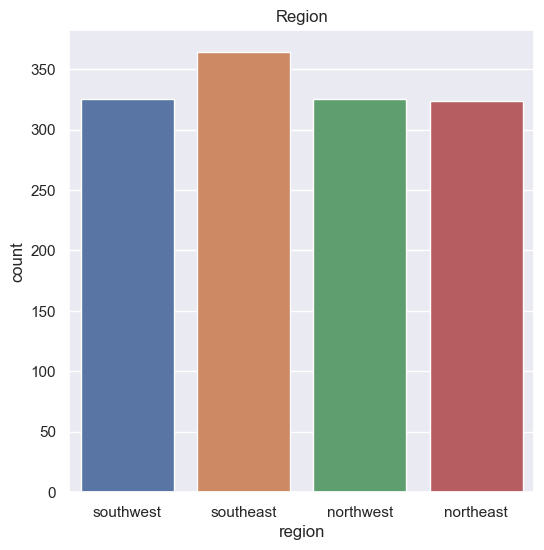

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [11]:
# Region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('Region')
plt.show()
insurance_dataset['region'].value_counts()

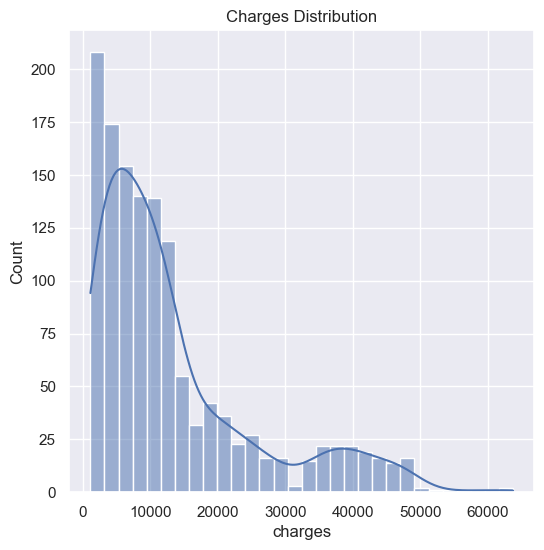

In [12]:
# Charges distribution
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['charges'], kde=True)
plt.title('Charges Distribution')
plt.show()

## Data Preprocessing

In [14]:
# Encoding categorical features
insurance_dataset.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
insurance_dataset.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)
insurance_dataset.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)

## Splitting Features and Target

In [16]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training & Evaluation

In [20]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, Y_train)
    preds = model.predict(X_test_scaled)
    mae = mean_absolute_error(Y_test, preds)
    mse = mean_squared_error(Y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, preds)
    results.append((name, mae, mse, rmse, r2))

# Print comparison table
print("\nModel Comparison:")
print("{:<20} {:<15} {:<20} {:<15} {:<10}".format("Model", "MAE", "MSE", "RMSE", "R²"))
for name, mae, mse, rmse, r2 in results:
    print("{:<20} {:<15.2f} {:<20.2f} {:<15.2f} {:<10.3f}".format(name, mae, mse, rmse, r2))


Model Comparison:
Model                MAE             MSE                  RMSE            R²        
Linear Regression    4267.21         38337035.49          6191.69         0.745     
Random Forest        2717.11         24020661.84          4901.09         0.840     
Gradient Boosting    2389.80         19840711.65          4454.29         0.868     


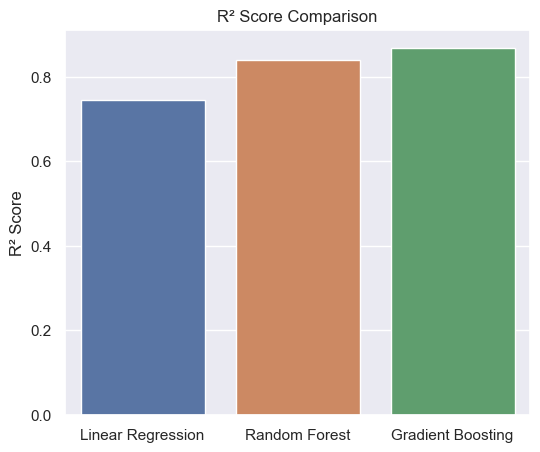

In [21]:
# R² Score Comparison
model_names = [r[0] for r in results]
r2_scores = [r[4] for r in results]

plt.figure(figsize=(6,5))
sns.barplot(x=model_names, y=r2_scores)
plt.title("R² Score Comparison")
plt.ylabel("R² Score")
plt.show()

## Building a Predictive System

In [23]:
# Re-train the model
model = RandomForestRegressor()
model.fit(X_train_scaled, Y_train)

# Save the model
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

model = joblib.load('model.pkl')
scaler = joblib.load('scaler.pkl')

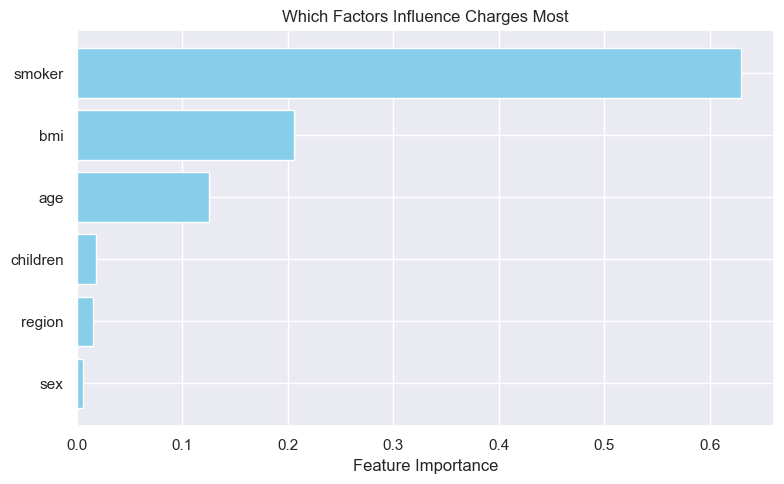

In [24]:
feature_names = X_train.columns  

importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Which Factors Influence Charges Most')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [25]:
# Define prediction function
def predict_insurance_cost(input_data, model, scaler):
    input_data_np = np.asarray(input_data).reshape(1, -1)
    input_scaled = scaler.transform(input_data_np)
    prediction = model.predict(input_scaled)
    return prediction[0]

example_input = (31, 0, 36.3, 2, 0, 1)  
predicted_cost = predict_insurance_cost(example_input, model, scaler)

print(f"The predicted insurance cost is USD {predicted_cost:.2f}")

The predicted insurance cost is USD 39719.79
